# HGCAL FE studies

### imports and initial setup

In [10]:
#imports and setup

%matplotlib inline
%cd /home/naodell/work/hgcal

import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from descartes import PolygonPatch
from tqdm import tqdm_notebook

from skhep.modeling import bayesian_blocks
import scripts.helpers as hlp
import scripts.readout_algorithms as algos

import matplotlib
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica Neue') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 12})


/home/naodell/work/hgcal


### get the data mixtures

In the script `**.py`, I make mixtures of signal and pileup samples.  

In [22]:
gen_list = []
df_list = []
threshold_list = []

#inputdir = 'data/mc_mixtures/qcd_pt15to7000_skim_test'
#inputdir = 'data/mc_mixtures/single_electron_pt15_pu200_skim_test'
#inputdir = 'data/mc_mixtures/single_electron_pt35_skim_test'
inputdir = 'data/mc_mixtures/single_pi_pt25_skim_test'
suffix = 'pi_pt25'

for filename in os.listdir(inputdir):
    data_file = open(f'{inputdir}/{filename}', 'rb')
    threshold = pickle.load(data_file)
    gen = pickle.load(data_file)
    df = pickle.load(data_file)
    
    threshold_list.extend(len(df)*[threshold, ])
    gen_list.extend(gen)
    df_list.extend(df)
    data_file.close()
    
    break

cuts = sorted(list(set(threshold_list)))
algo_list = ['baseline', 
             'threshold_1bx_esort',  'threshold_1bx_nosort', 
             'threshold_8bx_esort',  'threshold_8bx_nosort'
            ]
ratios = {n:{t:[] for t in set(threshold_list)} for n in algo_list}
effs   = {n:{t:[] for t in set(threshold_list)} for n in algo_list[1:]}
cell_labels = ['zside', 'layer', 'sector', 'panel']
data_list = list(zip(threshold_list, gen_list, df_list))
particle_list = {t:[] for t in set(threshold_list)}
count = 0
for threshold, gpart, data in tqdm_notebook(data_list, total=len(data_list)):
    #print(gpart)
    gen1 = gpart.iloc[0]
    gen2 = gpart.iloc[1]
    denom = gen1.pt
    
    df = data.query('sim_e > 0')
    
    # match simhits to gen particles
    #deta1 = abs(gen1.eta - df.eta)
    #deta2 = abs(gen2.eta - df.eta)
    #
    #dphi1 = abs(df.phi - gen1.phi)
    #dphi1[dphi1 > np.pi] = 2*np.pi - dphi1
    #dphi2 = abs(df.phi - gen1.phi)
    #dphi2[dphi2 > np.pi] = 2*np.pi - dphi2
    #
    #df = df[((dphi1 < 0.4) & (deta1 < 0.1)) | ((dphi2 < 0.4) & (deta2 < 0.1))]
    denom = df.groupby('zside').sum()['sim_e']
    print(gen1.e, gen2.e)
    print(denom)
    #print(df.groupby('zside').sum()[['reco_e', 'sim_e']])
    
    n_simhits = df.shape[0]
    if n_simhits == 0:
        continue
        
    for algo in algo_list:
        df_algo = df
        if algo != 'baseline':
            df_algo = df.query(f'{algo}')
            effs[algo][threshold].append(df_algo.shape[0]/n_simhits)
            #print(algo, df_algo.shape[0], n_simhits)

        sumpt = df_algo.groupby('zside').sum()['sim_e']
        r = sumpt/denom
        ratios[algo][threshold].append(r.values)
        
        #print(algo, r.values)
    #print('')
    particle_list[threshold].append(np.array([gen1.pt, abs(gen1.eta)]))
    
particle_list = {t:np.vstack(pl) for t, pl in particle_list.items()}
ratios = {a:{pt:np.concatenate(d) for pt, d in algo_data.items()} for a, algo_data in ratios.items()}

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

97.13172149658203 97.13172149658203
zside
-1    38.235901
 1     0.204737
Name: sim_e, dtype: float64
73.15731811523438 73.15731811523438
zside
-1    20.906972
 1     9.842251
Name: sim_e, dtype: float64
166.246337890625 166.246337890625
zside
-1     38.291982
 1    131.519081
Name: sim_e, dtype: float64
144.5060577392578 144.5060577392578
zside
-1    41.110652
 1    44.313305
Name: sim_e, dtype: float64
77.1610336303711 77.1610336303711
zside
-1    6.156250
 1    4.328822
Name: sim_e, dtype: float64
144.17568969726562 144.17568969726562
zside
-1    6.310018
 1    6.853945
Name: sim_e, dtype: float64
165.75904846191406 165.75904846191406
zside
-1    37.556130
 1     1.877689
Name: sim_e, dtype: float64
94.39705657958984 94.39705657958984
zside
-1    40.004745
 1    17.855977
Name: sim_e, dtype: float64
112.25608825683594 112.25608825683594
zside
-1    10.857501
 1     8.400040
Name: sim_e, dtype: float64
108.99747467041016 108.99747467041016
zside
-1    26.982399
 1     0.265033
Name: 

140.82235717773438 140.82235717773438
zside
-1    45.091414
 1     2.529650
Name: sim_e, dtype: float64
81.56636047363281 81.56636047363281
zside
-1     8.217253
 1    21.636266
Name: sim_e, dtype: float64
137.34738159179688 137.34738159179688
zside
-1    17.728675
 1    25.308415
Name: sim_e, dtype: float64
147.03358459472656 147.03358459472656
zside
-1    42.808617
 1    17.631079
Name: sim_e, dtype: float64
171.82766723632812 171.82766723632812
zside
-1    18.148345
 1    20.409041
Name: sim_e, dtype: float64
93.5895767211914 93.5895767211914
zside
-1    59.513865
 1    27.422748
Name: sim_e, dtype: float64
180.71250915527344 180.71250915527344
zside
-1    47.684285
 1    86.857719
Name: sim_e, dtype: float64
87.76612854003906 87.76612854003906
zside
-1    50.487033
 1    15.635204
Name: sim_e, dtype: float64
171.64234924316406 171.64234924316406
zside
-1    0.100721
 1    8.192531
Name: sim_e, dtype: float64
185.11170959472656 185.11170959472656
zside
-1    129.596935
 1     65.979

157.74952697753906 157.74952697753906
zside
-1    77.985083
 1    48.250053
Name: sim_e, dtype: float64
82.46957397460938 82.46957397460938
zside
-1     9.484056
 1    38.486654
Name: sim_e, dtype: float64
184.62548828125 184.62548828125
zside
-1    44.765120
 1    45.418513
Name: sim_e, dtype: float64
139.41213989257812 139.41213989257812
zside
-1    91.649866
 1    28.807746
Name: sim_e, dtype: float64
99.05389404296875 99.05389404296875
zside
-1    82.241110
 1    22.071944
Name: sim_e, dtype: float64
154.2701416015625 154.2701416015625
zside
-1    59.506285
 1     7.948351
Name: sim_e, dtype: float64
75.74413299560547 75.74413299560547
zside
-1    11.359752
 1    42.472358
Name: sim_e, dtype: float64
115.30438995361328 115.30438995361328
zside
-1    34.439397
 1    19.264072
Name: sim_e, dtype: float64
106.82573699951172 106.82573699951172
zside
-1    40.735685
 1    28.155087
Name: sim_e, dtype: float64
146.8574676513672 146.8574676513672
zside
-1    117.462673
 1      0.123387
Na

145.45364379882812 145.45364379882812
zside
-1    11.664099
 1    99.841701
Name: sim_e, dtype: float64
128.09165954589844 128.09165954589844
zside
-1    39.432173
 1    38.360876
Name: sim_e, dtype: float64
101.3712158203125 101.3712158203125
zside
-1    17.773289
 1     8.112423
Name: sim_e, dtype: float64
109.0407943725586 109.0407943725586
zside
-1    36.128989
 1    56.175792
Name: sim_e, dtype: float64
160.03314208984375 160.03314208984375
zside
-1    25.654996
 1     6.551046
Name: sim_e, dtype: float64
145.35589599609375 145.35589599609375
zside
-1    44.317661
 1    53.549756
Name: sim_e, dtype: float64
112.8144760131836 112.8144760131836
zside
-1    34.299356
 1    21.758714
Name: sim_e, dtype: float64
106.45744323730469 106.45744323730469
zside
-1     2.470979
 1    45.737485
Name: sim_e, dtype: float64
157.06866455078125 157.06866455078125
zside
-1    20.299683
 1    37.554916
Name: sim_e, dtype: float64
125.53590393066406 125.53590393066406
zside
-1    42.605994
 1    10.2

98.19416809082031 98.19416809082031
zside
-1    37.234854
 1     1.298034
Name: sim_e, dtype: float64
74.45216369628906 74.45216369628906
zside
-1     9.536733
 1    35.827390
Name: sim_e, dtype: float64
79.93181610107422 79.93181610107422
zside
-1    20.198581
 1    37.300470
Name: sim_e, dtype: float64
89.31208038330078 89.31208038330078
zside
-1     4.325399
 1    47.313130
Name: sim_e, dtype: float64
124.66705322265625 124.66705322265625
zside
-1    75.418475
 1    37.911373
Name: sim_e, dtype: float64
97.55052185058594 97.55052185058594
zside
-1    67.673155
 1    45.252963
Name: sim_e, dtype: float64
147.7570343017578 147.7570343017578
zside
-1    32.833450
 1    34.546931
Name: sim_e, dtype: float64
74.96619415283203 74.96619415283203
zside
-1    40.950030
 1    22.527534
Name: sim_e, dtype: float64
110.25348663330078 110.25348663330078
zside
-1    23.312582
 1    24.440777
Name: sim_e, dtype: float64
76.25373840332031 76.25373840332031
zside
-1    17.822201
 1    19.488716
Name

161.07786560058594 161.07786560058594
zside
-1    20.102624
 1    73.248610
Name: sim_e, dtype: float64
161.5934295654297 161.5934295654297
zside
-1     5.345548
 1    90.982095
Name: sim_e, dtype: float64
162.75022888183594 162.75022888183594
zside
-1    33.019084
 1    20.602583
Name: sim_e, dtype: float64
92.64336395263672 92.64336395263672
zside
-1    11.894389
 1    40.445220
Name: sim_e, dtype: float64
130.3733367919922 130.3733367919922
zside
-1    19.030326
 1    37.087245
Name: sim_e, dtype: float64
128.0753173828125 128.0753173828125
zside
-1    13.406776
 1    23.051126
Name: sim_e, dtype: float64
93.20350646972656 93.20350646972656
zside
-1    0.256748
 1    0.212408
Name: sim_e, dtype: float64
177.79653930664062 177.79653930664062
zside
-1    114.244981
 1     68.171842
Name: sim_e, dtype: float64
168.04806518554688 168.04806518554688
zside
-1    75.406115
 1    38.504850
Name: sim_e, dtype: float64
116.18141174316406 116.18141174316406
zside
-1    98.288754
 1     6.47825

98.81488037109375 98.81488037109375
zside
-1     1.843321
 1    36.171370
Name: sim_e, dtype: float64
162.88540649414062 162.88540649414062
zside
-1    26.613744
 1     4.440029
Name: sim_e, dtype: float64
105.1200180053711 105.1200180053711
zside
-1     4.592959
 1    34.116400
Name: sim_e, dtype: float64
71.42223358154297 71.42223358154297
zside
-1    14.386598
 1     3.395425
Name: sim_e, dtype: float64
172.2438507080078 172.2438507080078
zside
-1    38.093032
 1    49.804259
Name: sim_e, dtype: float64
138.77279663085938 138.77279663085938
zside
-1    18.643737
 1    57.289645
Name: sim_e, dtype: float64
112.78053283691406 112.78053283691406
zside
-1    112.281715
 1     60.205366
Name: sim_e, dtype: float64
96.26083374023438 96.26083374023438
zside
-1    47.391604
 1    27.796313
Name: sim_e, dtype: float64
88.12985229492188 88.12985229492188
zside
-1     9.863735
 1    20.710475
Name: sim_e, dtype: float64
101.7436752319336 101.7436752319336
zside
-1    38.157952
 1     9.326598


181.5770721435547 181.5770721435547
zside
-1    18.583649
 1     0.263534
Name: sim_e, dtype: float64
108.44351959228516 108.44351959228516
zside
-1    63.704339
 1    63.003526
Name: sim_e, dtype: float64
79.18449401855469 79.18449401855469
zside
-1     0.646616
 1    44.610799
Name: sim_e, dtype: float64
101.63603210449219 101.63603210449219
zside
-1    13.167730
 1     0.283029
Name: sim_e, dtype: float64
88.38262939453125 88.38262939453125
zside
-1    16.127412
 1     3.409320
Name: sim_e, dtype: float64
116.48501586914062 116.48501586914062
zside
-1     2.792030
 1    21.674183
Name: sim_e, dtype: float64
132.59881591796875 132.59881591796875
zside
-1    98.657302
 1    19.191373
Name: sim_e, dtype: float64
177.70578002929688 177.70578002929688
zside
-1    60.858898
 1    13.544337
Name: sim_e, dtype: float64
102.74738311767578 102.74738311767578
zside
-1    18.184174
 1    23.529573
Name: sim_e, dtype: float64
108.5322494506836 108.5322494506836
zside
-1     4.760950
 1    29.646

179.50759887695312 179.50759887695312
zside
-1     0.460066
 1    71.207466
Name: sim_e, dtype: float64
106.8144760131836 106.8144760131836
zside
-1    0.306807
 1    0.357769
Name: sim_e, dtype: float64
150.198486328125 150.198486328125
zside
-1    74.000892
 1    27.275184
Name: sim_e, dtype: float64
175.08811950683594 175.08811950683594
zside
-1    99.776409
 1    74.233133
Name: sim_e, dtype: float64
88.92859649658203 88.92859649658203
zside
-1    30.305897
 1    51.837547
Name: sim_e, dtype: float64
135.997314453125 135.997314453125
zside
-1    48.066478
 1    56.474141
Name: sim_e, dtype: float64
109.41200256347656 109.41200256347656
zside
-1    19.591898
 1    43.739906
Name: sim_e, dtype: float64
104.22364044189453 104.22364044189453
zside
-1    81.983895
 1    34.688195
Name: sim_e, dtype: float64
75.4458999633789 75.4458999633789
zside
-1    24.270592
 1    29.425509
Name: sim_e, dtype: float64
182.05104064941406 182.05104064941406
zside
-1    15.240070
 1    75.591237
Name: 

124.05155181884766 124.05155181884766
zside
-1    13.149405
 1    15.863819
Name: sim_e, dtype: float64
108.12808227539062 108.12808227539062
zside
-1    11.343789
 1    19.926394
Name: sim_e, dtype: float64
81.35881042480469 81.35881042480469
zside
-1    20.505646
 1    21.627133
Name: sim_e, dtype: float64
109.46284484863281 109.46284484863281
zside
-1    20.34257
 1    78.27195
Name: sim_e, dtype: float64
104.96735382080078 104.96735382080078
zside
-1    6.819269
 1    5.616747
Name: sim_e, dtype: float64
144.67445373535156 144.67445373535156
zside
-1    49.296094
 1     2.957841
Name: sim_e, dtype: float64
87.66847229003906 87.66847229003906
zside
-1    56.578850
 1    28.437224
Name: sim_e, dtype: float64
134.4590606689453 134.4590606689453
zside
-1    33.303812
 1    48.580256
Name: sim_e, dtype: float64
110.78797149658203 110.78797149658203
zside
-1     5.087665
 1    62.451052
Name: sim_e, dtype: float64
77.9515151977539 77.9515151977539
zside
-1    33.585167
 1    39.636671
Na

96.72510528564453 96.72510528564453
zside
-1     0.821020
 1    33.154333
Name: sim_e, dtype: float64
102.14852905273438 102.14852905273438
zside
-1    51.845701
 1     6.645422
Name: sim_e, dtype: float64
118.7375259399414 118.7375259399414
zside
-1    7.362666
 1    7.079062
Name: sim_e, dtype: float64
82.4101333618164 82.4101333618164
zside
-1    10.727619
 1     0.257042
Name: sim_e, dtype: float64
76.66065979003906 76.66065979003906
zside
-1    17.474854
 1    15.635917
Name: sim_e, dtype: float64
106.29186248779297 106.29186248779297
zside
-1    20.650059
 1    12.811742
Name: sim_e, dtype: float64
183.48207092285156 183.48207092285156
zside
-1    78.490477
 1    41.325309
Name: sim_e, dtype: float64
168.42388916015625 168.42388916015625
zside
-1    18.056775
 1    29.099666
Name: sim_e, dtype: float64
95.98334503173828 95.98334503173828
zside
-1    22.648944
 1    30.946603
Name: sim_e, dtype: float64
156.9726104736328 156.9726104736328
zside
-1    53.280401
 1    60.745033
Name

148.18215942382812 148.18215942382812
zside
-1    18.368822
 1    54.078652
Name: sim_e, dtype: float64
143.8673858642578 143.8673858642578
zside
-1    11.752600
 1     5.868592
Name: sim_e, dtype: float64
155.05722045898438 155.05722045898438
zside
-1    12.143517
 1    14.602460
Name: sim_e, dtype: float64
174.78492736816406 174.78492736816406
zside
-1    148.741851
 1     84.904307
Name: sim_e, dtype: float64
113.37242889404297 113.37242889404297
zside
-1    33.708566
 1    18.190872
Name: sim_e, dtype: float64
171.88462829589844 171.88462829589844
zside
-1    48.688852
 1    73.643931
Name: sim_e, dtype: float64
157.61709594726562 157.61709594726562
zside
-1    22.125119
 1     3.501685
Name: sim_e, dtype: float64
114.36669921875 114.36669921875
zside
-1     5.686052
 1    40.278699
Name: sim_e, dtype: float64
173.82078552246094 173.82078552246094
zside
-1    10.864261
 1    37.781248
Name: sim_e, dtype: float64
81.98106384277344 81.98106384277344
zside
-1    39.219185
 1    31.725

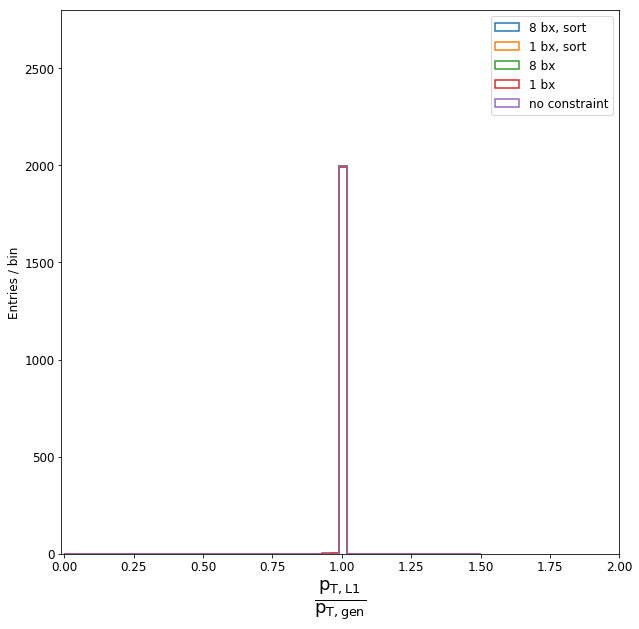

In [19]:
# mip_pt > 2 histograms
fig = plt.figure(figsize=(10, 10), facecolor='white')

ax = plt.subplot()
n_bins = 50
ax.hist(ratios['threshold_8bx_esort'][cuts[0]], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')
ax.hist(ratios['threshold_1bx_esort'][cuts[0]], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')
ax.hist(ratios['threshold_8bx_nosort'][cuts[0]], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')
ax.hist(ratios['threshold_1bx_nosort'][cuts[0]], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')
h, b, _ = ax.hist(ratios['baseline'][cuts[0]], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')

ax.set_xlim(-0.01, 2.)
ax.set_ylim(0, 1.4*np.max(h))
ax.set_xlabel(r'$\sf \frac{p_{T,L1}}{p_{T,gen}}$', fontsize=26)
ax.set_ylabel('Entries / bin')

labels = ['8 bx, sort', '1 bx, sort', '8 bx', '1 bx', 'no constraint']
#labels = ['8 bx, sort', '8 bx', 'no constraint']
ax.legend(labels)

plt.savefig(f'plots/threshold_algo_resolution_{suffix}.pdf')
plt.show()

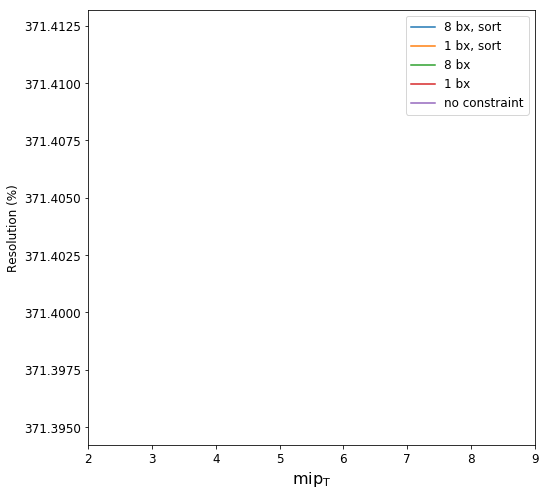

In [13]:
# mip_pt resolution scans
resolutions = {a:[100*algo_data[c].std()/algo_data[c].mean() for c in cuts] for a, algo_data in ratios.items()}

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor='white')
ax.plot(cuts, resolutions['threshold_8bx_esort'])
ax.plot(cuts, resolutions['threshold_1bx_esort'])
ax.plot(cuts, resolutions['threshold_8bx_nosort'])
ax.plot(cuts, resolutions['threshold_1bx_nosort'])
ax.plot(cuts, resolutions['baseline'])

ax.set_xlim(2, 9.)
ax.set_xlabel(r'$\sf mip_{T}$', fontsize=16)
ax.set_ylabel('Resolution (%)')

labels = ['8 bx, sort', '1 bx, sort', '8 bx', '1 bx', 'no constraint']
ax.legend(labels)

plt.savefig(f'plots/resolution_mip_scan_{suffix}.pdf')
plt.show()

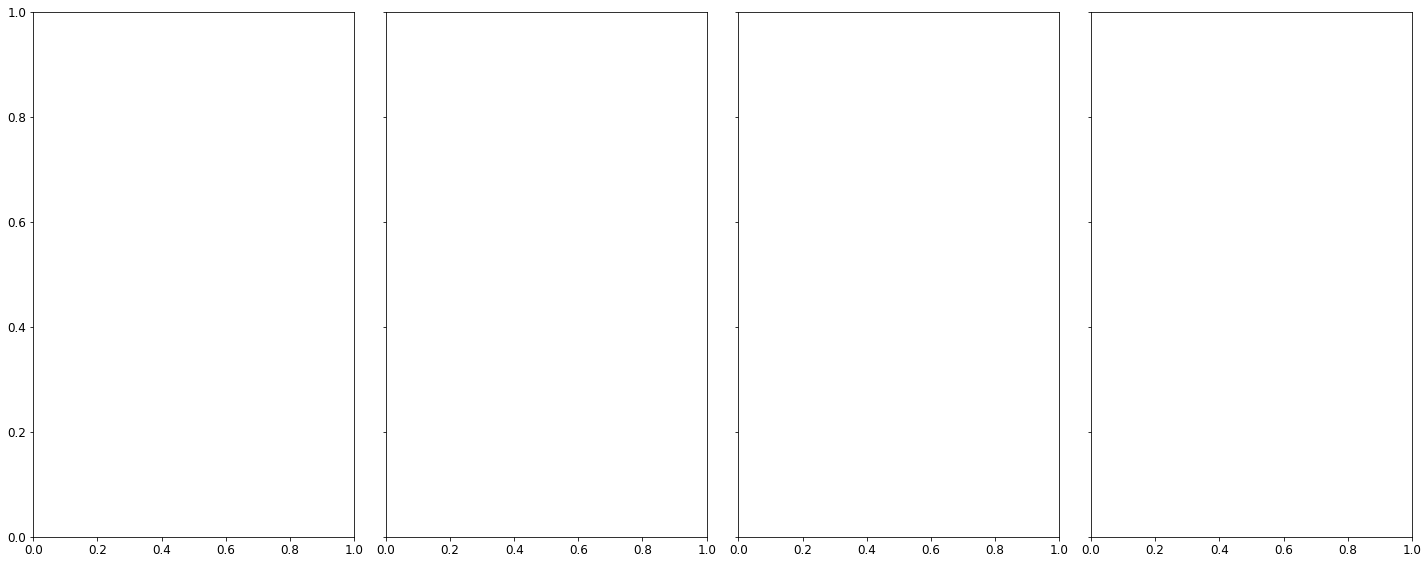

In [14]:
#
fig, axes = plt.subplots(1, 4, figsize=(20, 8), facecolor='white', sharey=True)

for i, c in enumerate(cuts[1::2]):
    ax = axes[i]
    x = particle_list[c][:,1]
    y = ratios['threshold_8bx_esort'][c][:x.size]
    ax.scatter(x, y, s=10)
    #ax.scatter(particle_list[c][:,1], ratios['threshold_1bx_esort'][c][::2], s=10)
    y = ratios['threshold_8bx_nosort'][c][:x.size]
    ax.scatter(x, y, s=10)
    y = ratios['baseline'][c][:x.size]
    ax.scatter(x, y, s=10)
    ax.plot([1.65, 2.75], [1., 1.], 'r--', label='_nolegend_')
    
    ax.set_title(f'mip pt > {c}')
    ax.set_xlabel(r'$\eta_{gen}$')
    ax.set_xlim([1.65, 2.75])
    ax.set_ylim([0., 1.5])
    ax.grid()
    if i == 0:
        ax.set_ylabel(r'$\sf \frac{p_{T,L1}}{p_{T,gen}}$', fontsize=26)
    if i == 3:
        #labels = ['8 bx, sort', '1 bx, sort', '8 bx', '1 bx', 'no constraint']
        labels = ['8 bx, sort', '8 bx', 'no constraint']
        ax.legend(labels)
        break

plt.savefig(f'plots/res_vs_eta_{suffix}.pdf')
plt.tight_layout()
plt.show()

KeyError: 2.0

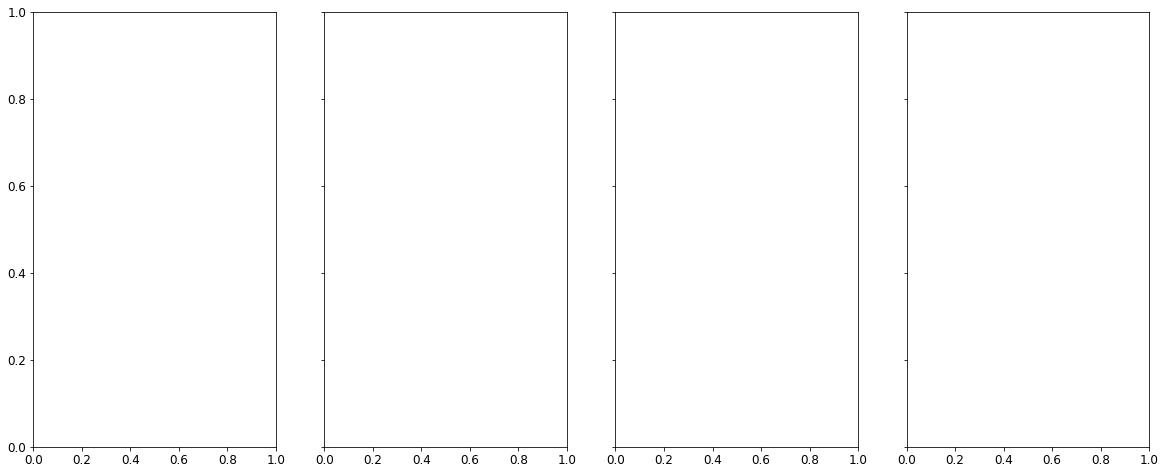

In [15]:
#
fig, axes = plt.subplots(1, 4, figsize=(20, 8), facecolor='white', sharey=True)

for i, c in enumerate([2.0, 4.0, 6.0, 8.0]):
    ax = axes[i]
    ax.scatter(particle_list[c][:,1], effs['threshold_8bx_esort'][c], s=10)
    ax.scatter(particle_list[c][:,1], effs['threshold_1bx_esort'][c], s=10)
    ax.scatter(particle_list[c][:,1], effs['threshold_8bx_nosort'][c], s=10)
    ax.scatter(particle_list[c][:,1], effs['threshold_1bx_nosort'][c], s=10)

    ax.set_xlabel(r'$\sf \eta_{gen}$')
    ax.set_title(f'mippt > {c}')
    if i == 0:
        ax.set_ylabel('readout efficiency')
    if i == 3:
        labels = ['8 bx, sort', '1 bx, sort', '8 bx', '1 bx']
        #labels = ['8 bx, sort', '8 bx']
        ax.legend(labels)
    ax.grid()

plt.savefig(f'plots/eff_vs_eta_{suffix}.pdf')
plt.tight_layout()
plt.show()

# eta-dependent mippt thresholds

From inspecting the $\eta$ dependence of the resolution for the various algorithms, it would appear that all algorithms show an improvement when the mip pt threshold is increased for the higher $\eta$ panels.

In [ ]:
#
fig, axes = plt.subplots(1, 1, figsize=(8, 8), facecolor='white', sharey=True)

# split samples at eta = 2.2
c_low, c_high = 2.0, 6.0
peta_low, peta_high = particle_list[c_low][:,1], particle_list[c_high][:,1]
r_eta_plus = ratios['threshold_8bx_nosort'][c_high][peta_high >= 2.2]
r_eta_minus = ratios['threshold_8bx_nosort'][c_low][peta_low < 2.2]

offset_plus, offset_minus = 1 - r_eta_plus.mean(), 1 - r_eta_minus.mean()

axes.hist([r_eta_plus + offset_plus, r_eta_minus + offset_minus], bins=n_bins, range=[0, 1.5], linewidth=1.5, histtype='step')
axes.set_xlim([0.5, 1.5])

stmp = r'$\delta = {0:.3f}$'.format(offset_plus) + '\n' + '$\sigma = {0:.1%}%$'.format(r_eta_plus.std())
axes.text(0.6, 175., stmp, fontdict=dict(color='C0', size=16),  bbox=dict(color='C0', alpha=0.5, fill=False))
stmp = r'$\delta = {0:.3f}$'.format(offset_minus) + '\n' + '$\sigma = {0:.1%}%$'.format(r_eta_minus.std())
axes.text(0.6, 150., stmp, fontdict=dict(color='C1', size=16),  bbox=dict(color='C1', alpha=0.5, fill=False))

axes.set_title(f'')
axes.set_ylabel('Entries')
axes.set_xlabel(r'$\sf \frac{p_{T,L1}}{p_{T,gen}} - \delta$', fontsize=18)
axes.legend([r'$|\eta| < 2.2\ (mip_{T} > 2)$', r'$|\eta| \geq 2.2\ (mip_{T} > 6)$'])

plt.tight_layout()
plt.savefig(f'plots/test_readout_resolution_{suffix}.pdf')
plt.show()
